**IMPORT**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('synthetic_retail_transactions.csv')

# Data exploration
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

print("\nData types:")
print(df.dtypes)

print("\nBasic statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Convert Purchase_Date to datetime
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], format='%d-%m-%Y')

# Calculate total revenue per transaction line
df['Revenue'] = df['Quantity'] * df['Unit_Price']

print("\nData preprocessing completed!")


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Dataset Shape: (8619, 8)

Columns: ['Transaction_ID', 'Customer_ID', 'Customer_Segment', 'Product_Category', 'Product_Name', 'Quantity', 'Unit_Price', 'Purchase_Date']

First few rows:
  Transaction_ID Customer_ID Customer_Segment Product_Category Product_Name  \
0           T001        C394          regular      Electronics       Laptop   
1           T001        C394          regular      Electronics        Mouse   
2           T001        C394          regular             FMCG   Toothbrush   
3           T002        C431          regular             FMCG      Shampoo   
4           T003        C250          regular       Home_Goods   Dinner Set   

   Quantity  Unit_Price Purchase_Date  
0         1       24406    18-11-2023  
1         1       19484    01-06-2023  
2        10          89    14-01-2023  
3         5          98    09-08-2023  
4         1        6180    05-08-2023  

Data types:
Transaction_ID      object
Customer_ID         object
Customer_Segment    object
Produc

**CHANGING DF **

In [21]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], format='%d-%m-%Y')
categorical_columns = ['Customer_Segment', 'Product_Category', 'Product_Name']
for col in categorical_columns:
    df[col] = df[col].astype('category')




In [22]:
print("\nData types:")
print(df.dtypes)



Data types:
Transaction_ID              object
Customer_ID                 object
Customer_Segment          category
Product_Category          category
Product_Name              category
Quantity                     int64
Unit_Price                   int64
Purchase_Date       datetime64[ns]
Revenue                      int64
dtype: object


**MARKETING KPI**

In [23]:
# Step 2: Calculate Marketing KPIs

def calculate_marketing_kpis(df):
    kpis = {}

    # 1. Average Basket Size (items per transaction)
    basket_size = df.groupby('Transaction_ID')['Quantity'].sum()
    kpis['Average Basket Size'] = basket_size.mean()

    # 2. Sales per Transaction (Revenue per transaction)
    sales_per_transaction = df.groupby('Transaction_ID')['Revenue'].sum()
    kpis['Sales per Transaction'] = sales_per_transaction.mean()

    # 3. Repeat Purchase Rate (% customers with multiple transactions)
    customer_transactions = df.groupby('Customer_ID')['Transaction_ID'].nunique()
    repeat_customers = (customer_transactions > 1).sum()
    total_customers = customer_transactions.count()
    kpis['Repeat Purchase Rate (%)'] = (repeat_customers / total_customers) * 100

    # 4. Customer Lifetime Value (Average revenue per customer)
    customer_revenue = df.groupby('Customer_ID')['Revenue'].sum()
    kpis['Customer Lifetime Value'] = customer_revenue.mean()

    # 5. Cross-sell Ratio (% of transactions with multiple categories)
    transaction_categories = df.groupby('Transaction_ID')['Product_Category'].nunique()
    cross_sell_transactions = (transaction_categories > 1).sum()
    total_transactions = len(transaction_categories)
    kpis['Cross-sell Ratio (%)'] = (cross_sell_transactions / total_transactions) * 100

    # 6. Average Order Value (same as Sales per Transaction)
    kpis['Average Order Value'] = sales_per_transaction.mean()

    # 7. Customer Segment Distribution
    segment_dist = df['Customer_Segment'].value_counts(normalize=True) * 100
    kpis['Premium Customer %'] = segment_dist.get('premium', 0)
    kpis['Regular Customer %'] = segment_dist.get('regular', 0)

    # 8. Revenue per Item
    kpis['Revenue per Item'] = df['Revenue'].sum() / df['Quantity'].sum()

    # 9. Average Purchase Frequency (transactions per customer)
    kpis['Average Purchase Frequency'] = customer_transactions.mean()

    # 10. Category Performance (% of total revenue by top category)
    category_revenue = df.groupby('Product_Category')['Revenue'].sum()
    top_category_pct = (category_revenue.max() / category_revenue.sum()) * 100
    kpis['Top Category Revenue %'] = top_category_pct

    return kpis

# Calculate KPIs
kpis = calculate_marketing_kpis(df)

# Create KPI summary table
kpi_df = pd.DataFrame(list(kpis.items()), columns=['KPI', 'Value'])
kpi_df['Interpretation'] = [
    'Average number of items purchased per transaction',
    'Average revenue generated per transaction',
    'Percentage of customers making repeat purchases',
    'Average total revenue per customer',
    'Percentage of transactions with multiple product categories',
    'Average monetary value per order',
    'Percentage of premium segment customers',
    'Percentage of regular segment customers',
    'Average revenue generated per item sold',
    'Average number of transactions per customer',
    'Revenue percentage from highest-performing category'
]

print("=== MARKETING KPIs SUMMARY (Real Data Only) ===")
print(kpi_df.to_string(index=False))

# Save KPI results
kpi_df.to_csv('marketing_kpis_real.csv', index=False)


=== MARKETING KPIs SUMMARY (Real Data Only) ===
                       KPI         Value                                              Interpretation
       Average Basket Size      8.179750           Average number of items purchased per transaction
     Sales per Transaction  16024.072500                   Average revenue generated per transaction
  Repeat Purchase Rate (%)     99.800000             Percentage of customers making repeat purchases
   Customer Lifetime Value 128192.580000                          Average total revenue per customer
      Cross-sell Ratio (%)     18.850000 Percentage of transactions with multiple product categories
       Average Order Value  16024.072500                            Average monetary value per order
        Premium Customer %     19.805082                     Percentage of premium segment customers
        Regular Customer %     80.194918                     Percentage of regular segment customers
          Revenue per Item   1958.992940   

**Apriori Algorithm Implementation**

In [24]:
# Step 3: Implement Apriori Algorithm for Market Basket Analysis

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

def prepare_basket_data(df):
    """Prepare data for market basket analysis"""
    # Create basket format - group products by transaction
    basket_data = df.groupby('Transaction_ID')['Product_Name'].apply(list).tolist()

    # Use Transaction Encoder to create binary matrix
    te = TransactionEncoder()
    basket_binary = te.fit(basket_data).transform(basket_data)
    basket_df = pd.DataFrame(basket_binary, columns=te.columns_)

    return basket_df, basket_data

def run_apriori_analysis(basket_df, min_support=0.01):
    """Run Apriori algorithm and generate association rules"""

    # Find frequent itemsets
    frequent_itemsets = apriori(basket_df, min_support=min_support, use_colnames=True)
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

    # Generate association rules
    if len(frequent_itemsets) > 0:
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
        rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
        rules['consequents_str'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))
    else:
        rules = pd.DataFrame()

    return frequent_itemsets, rules

# Prepare basket data
basket_df, basket_data = prepare_basket_data(df)

print(f"Basket data shape: {basket_df.shape}")
print(f"Number of unique products: {basket_df.shape[1]}")

# Run Apriori analysis
frequent_itemsets, rules = run_apriori_analysis(basket_df, min_support=0.005)

# Display top 10 frequent itemsets
print("\n=== TOP 10 FREQUENT ITEMSETS ===")
if len(frequent_itemsets) > 0:
    top_itemsets = frequent_itemsets.nlargest(10, 'support')[['itemsets', 'support', 'length']]
    for idx, row in top_itemsets.iterrows():
        items = ', '.join(list(row['itemsets']))
        print(f"Items: {items}")
        print(f"Support: {row['support']:.4f} | Length: {row['length']}")
        print("-" * 50)
else:
    print("No frequent itemsets found. Try lowering min_support.")

# Display top association rules
print("\n=== TOP 10 ASSOCIATION RULES ===")
if len(rules) > 0:
    top_rules = rules.nlargest(10, 'lift')[['antecedents_str', 'consequents_str', 'support', 'confidence', 'lift']]
    for idx, row in top_rules.iterrows():
        print(f"Rule: {row['antecedents_str']} → {row['consequents_str']}")
        print(f"Support: {row['support']:.4f} | Confidence: {row['confidence']:.4f} | Lift: {row['lift']:.4f}")
        print("-" * 70)
else:
    print("No association rules found. Try lowering thresholds.")

# Save results
frequent_itemsets.to_csv('frequent_itemsets.csv', index=False)
if len(rules) > 0:
    rules.to_csv('association_rules.csv', index=False)


Basket data shape: (4000, 60)
Number of unique products: 60

=== TOP 10 FREQUENT ITEMSETS ===
Items: Shampoo
Support: 0.1467 | Length: 1
--------------------------------------------------
Items: Soap
Support: 0.1427 | Length: 1
--------------------------------------------------
Items: Soap, Shampoo
Support: 0.1288 | Length: 2
--------------------------------------------------
Items: Shirt
Support: 0.0777 | Length: 1
--------------------------------------------------
Items: Trouser
Support: 0.0775 | Length: 1
--------------------------------------------------
Items: Tea
Support: 0.0645 | Length: 1
--------------------------------------------------
Items: Shirt, Trouser
Support: 0.0617 | Length: 2
--------------------------------------------------
Items: Mouse
Support: 0.0597 | Length: 1
--------------------------------------------------
Items: Laptop
Support: 0.0590 | Length: 1
--------------------------------------------------
Items: Rice
Support: 0.0560 | Length: 1
-------------------

**Visualizations**:

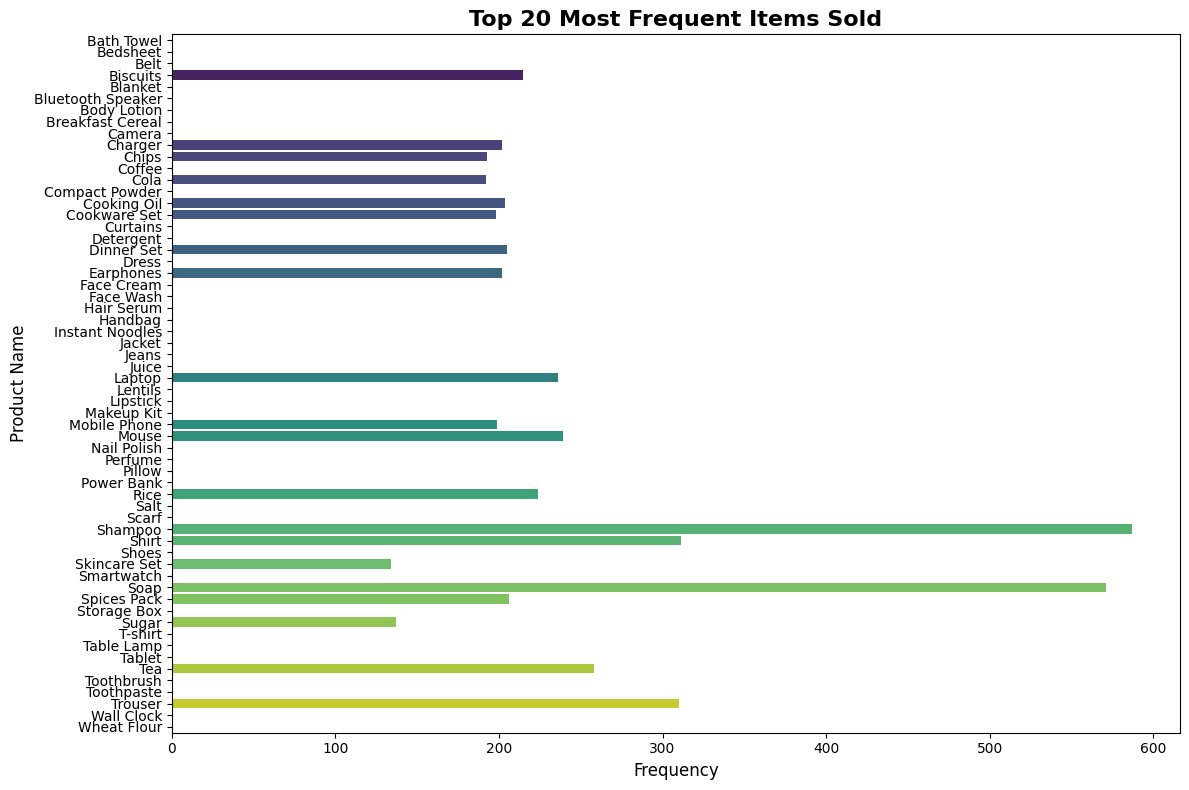

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Item frequency plot
def create_item_frequency_plot(df):
    item_frequency = df['Product_Name'].value_counts().head(20)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=item_frequency.values, y=item_frequency.index,
                palette='viridis')
    plt.title('Top 20 Most Frequent Items Sold', fontsize=16, fontweight='bold')
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Product Name', fontsize=12)
    plt.tight_layout()
    plt.show()

create_item_frequency_plot(df)


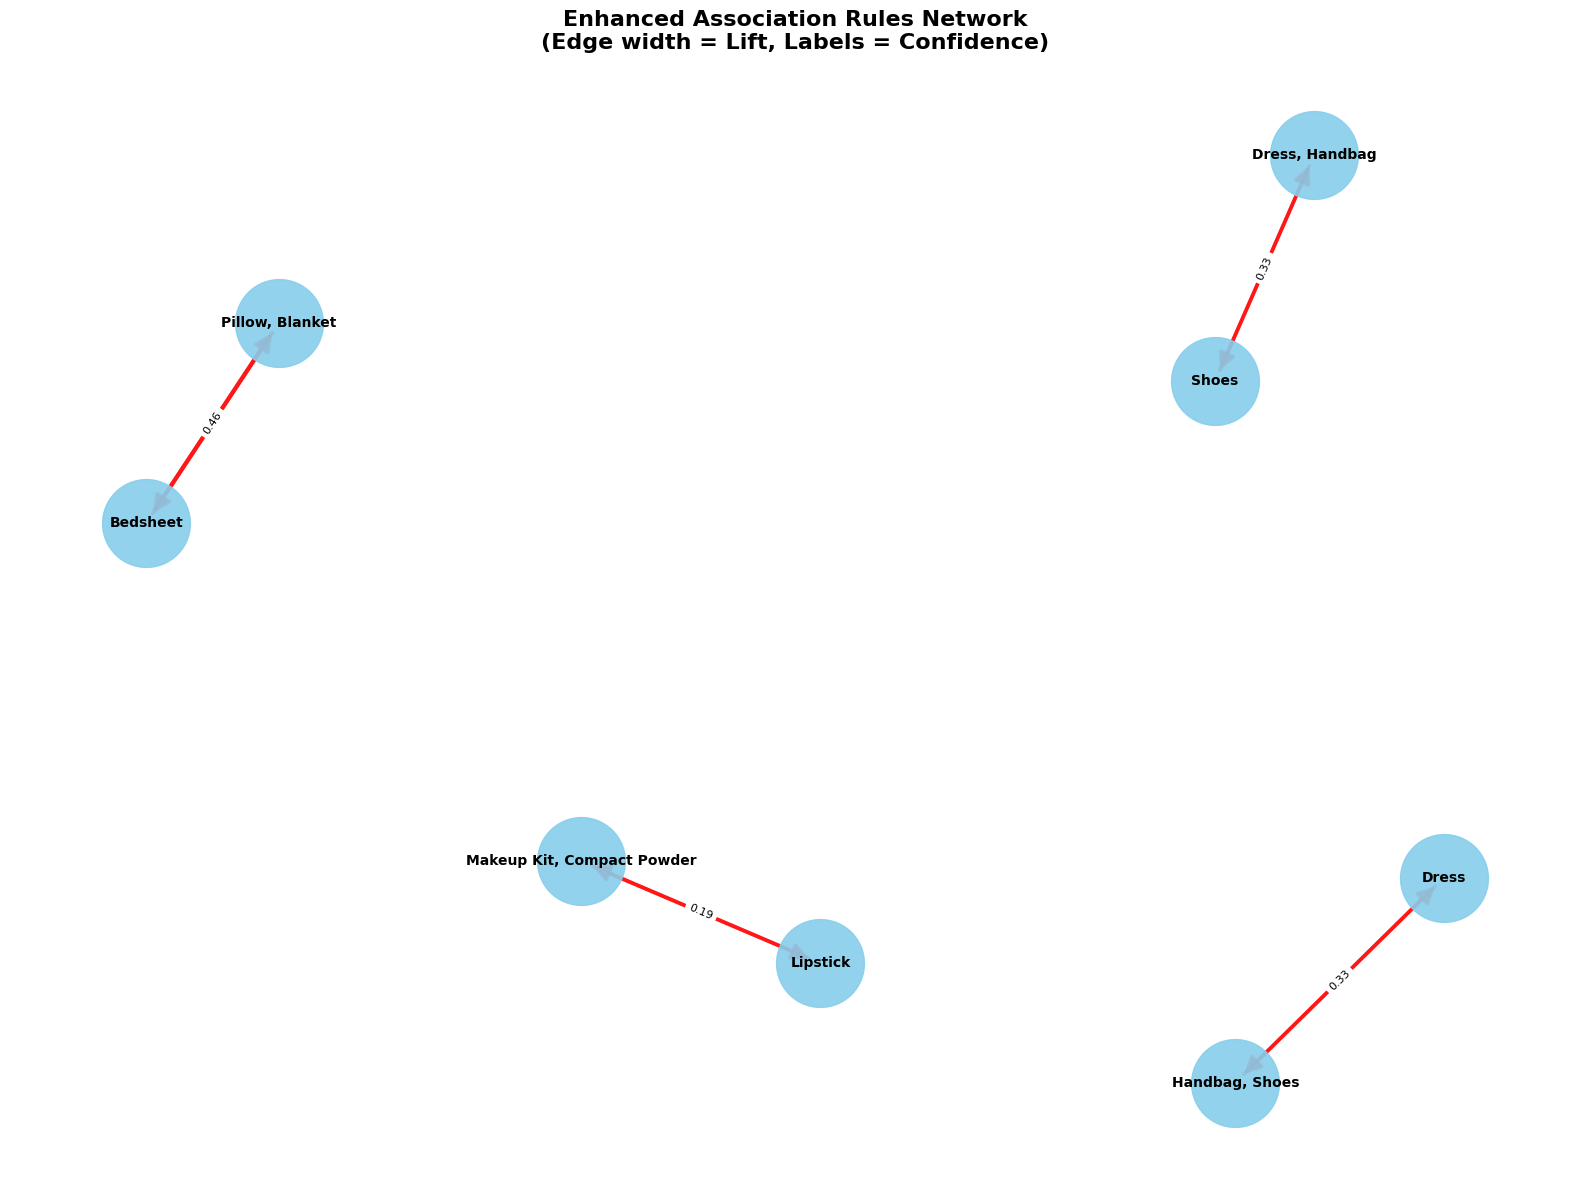

In [27]:
def create_enhanced_network(rules):
    """Create network with confidence labels on edges"""

    if len(rules) == 0:
        return

    top_rules = rules.nlargest(8, 'lift')  # Fewer rules for clarity
    G = nx.DiGraph()

    for _, row in top_rules.iterrows():
        G.add_edge(row['antecedents_str'], row['consequents_str'],
                   weight=row['lift'], confidence=row['confidence'])

    plt.figure(figsize=(16, 12))
    pos = nx.spring_layout(G, k=3, iterations=50)

    # Draw network
    nx.draw_networkx_nodes(G, pos, node_size=4000, node_color='skyblue', alpha=0.9)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

    # Draw edges
    weights = [G[u][v]['weight'] for u, v in G.edges()]
    max_weight = max(weights) if weights else 1
    edge_widths = [3 * (w/max_weight) for w in weights]

    nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.7,
                          edge_color='red', arrows=True, arrowsize=25)

    # Add confidence labels on edges
    edge_labels = {(u, v): f"{G[u][v]['confidence']:.2f}"
                   for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)

    plt.title('Enhanced Association Rules Network\n(Edge width = Lift, Labels = Confidence)',
              fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Create enhanced version
create_enhanced_network(rules)

**INTERPRETATION**    **STEP 1 STOPS**

**Marketing Mix Modelling**





In [35]:
# Load the MMM dataset
file_path = '/content/mmm_synthetic_dataset.csv'
df = pd.read_csv(file_path)

print("📊 Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Convert Week to datetime
df['Week'] = pd.to_datetime(df['Week'])

# Check for missing values
print(f"\n🔍 Missing Values:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Basic statistics
print(f"\n📈 Sales Statistics:")
print(f"Min: ${df['Sales'].min():,.0f}")
print(f"Max: ${df['Sales'].max():,.0f}")
print(f"Mean: ${df['Sales'].mean():,.0f}")

# Display first few rows
df.head()

📊 Dataset Overview:
Shape: (105, 13)
Columns: ['Week', 'Year', 'TV_Spend', 'Digital_Spend', 'Social_Media_Spend', 'Radio_Spend', 'Print_Spend', 'OOH_Spend', 'Price_Index', 'Promotion_Flag', 'Holiday_Season', 'Competitor_Spend', 'Sales']

🔍 Missing Values:
Series([], dtype: int64)

📈 Sales Statistics:
Min: $39,740
Max: $65,196
Mean: $53,124


,Week,Year,TV_Spend,Digital_Spend,Social_Media_Spend,Radio_Spend,Print_Spend,OOH_Spend,Price_Index,Promotion_Flag,Holiday_Season,Competitor_Spend,Sales
0,2023-01-02,2023,195455.898261,200797.999576,200000.000000,78410.397081,11522.041514,65787.558284,1.001504,1,0,222238.031864,53142.590261
1,2023-01-09,2023,318406.147478,132374.211273,129881.703922,29481.542484,42384.126971,76818.038001,1.005154,0,0,236238.213977,52770.020223
2,2023-01-16,2023,291718.693186,115843.021660,91997.439321,64847.555666,21195.085901,58587.458792,1.029188,0,0,331948.396160,53836.339207
3,2023-01-23,2023,300934.068004,167396.011785,170937.162553,37500.150465,26710.441713,55396.581123,1.028612,0,0,328421.969372,59862.434233
4,2023-01-30,2023,188818.912631,135914.058949,108241.666236,36685.577382,21040.420900,94522.093680,1.030623,0,0,272878.750010,54741.706174


**DATA PREPERATION**

In [39]:
# Handle any missing values (forward fill method)
df.fillna(method='ffill', inplace=True)

# Define marketing channels and control variables
marketing_channels = ['TV_Spend', 'Digital_Spend', 'Social_Media_Spend',
                      'Radio_Spend', 'Print_Spend', 'OOH_Spend']

control_variables = ['Promotion_Flag', 'Holiday_Season', 'Competitor_Spend', 'Price_Index']
all_features = marketing_channels + control_variables

print("📺 Marketing Channels:")
for channel in marketing_channels:
    avg_spend = df[channel].mean()
    print(f"  • {channel.replace('_', ' ')}: ${avg_spend:,.0f}")

print(f"\n🎛️ Control Variables: {control_variables}")
print(f"✅ Total features: {len(all_features)}")

📺 Marketing Channels:
  • TV Spend: $229,662
  • Digital Spend: $133,185
  • Social Media Spend: $125,697
  • Radio Spend: $51,591
  • Print Spend: $28,719
  • OOH Spend: $54,054

🎛️ Control Variables: ['Promotion_Flag', 'Holiday_Season', 'Competitor_Spend', 'Price_Index']
✅ Total features: 10


**TRAIN/TEST SPLIT **

In [40]:
# Prepare features and target
X = df[all_features]
y = df['Sales']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Standardize features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, shuffle=False
)

print(f"\n📊 Data Split:")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"✅ Data prepared for modeling!")

Features shape: (105, 10)
Target shape: (105,)

📊 Data Split:
Training samples: 84
Testing samples: 21
✅ Data prepared for modeling!


****7 MODELS AND COMPARISION MATRIX****

In [65]:
# === COMPREHENSIVE MODEL ANALYSIS SCRIPT ===

# 1. Imports and Setup
# =================================================================
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# Note: X_train, y_train, X_test, y_test must be defined in your environment
# for this script to run correctly.

# 2. Model Configuration and Training
# =================================================================
print("🚀 Training 7 Different Models for MMM...")

# Define all models with hyperparameter grids
models_config = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Ridge Regression': {
        'model': Ridge(),
        'params': {'alpha': [0.1, 1.0, 10.0, 100.0]}
    },
    'Lasso Regression': {
        'model': Lasso(),
        'params': {'alpha': [0.01, 0.1, 1.0, 10.0]}
    },
    'Elastic Net': {
        'model': ElasticNet(),
        'params': {'alpha': [0.1, 1.0], 'l1_ratio': [0.5, 0.7]}
    },
    'Bayesian Ridge': {
        'model': BayesianRidge(),
        'params': {'alpha_1': [1e-6, 1e-5], 'alpha_2': [1e-6, 1e-5]}
    },
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {'n_estimators': [100, 200], 'max_depth': [10, 15]}
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, verbosity=0),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [4, 6],
            'learning_rate': [0.05, 0.1],
            'reg_alpha': [0.5, 1.0],      # L1 regularization
            'reg_lambda': [0.5, 1.0],     # L2 regularization
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    }
}

# Train and evaluate all models
model_results = {}

for name, config in models_config.items():
    print(f"Training {name}...")

    if config['params']:
        # Use GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(
            config['model'], config['params'],
            cv=3, scoring='neg_mean_squared_error', n_jobs=-1
        )
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        if name in ['Ridge Regression', 'Lasso Regression', 'Elastic Net', 'Bayesian Ridge', 'XGBoost']:
            print(f"   Best params: {grid_search.best_params_}")
    else:
        # No hyperparameters to tune
        best_model = config['model']
        best_model.fit(X_train, y_train)

    # Make predictions
    train_pred = best_model.predict(X_train)
    test_pred = best_model.predict(X_test)

    # Calculate metrics
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    mape = mean_absolute_percentage_error(y_test, test_pred) * 100

    model_results[name] = {
        'model': best_model,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'rmse': rmse,
        'mape': mape,
        'predictions': test_pred
    }

    print(f"   ✅ {name}: R²={test_r2:.4f}, RMSE={rmse:.0f}")

print(f"\n🏆 All {len(model_results)} models trained successfully!")

# 3. Model Comparison and Ranking
# =================================================================
comparison_data = []
for name, results in model_results.items():
    comparison_data.append({
        'Model': name,
        'Train_R²': results['train_r2'],
        'Test_R²': results['test_r2'],
        'RMSE': results['rmse'],
        'MAPE_%': results['mape'],
        'Overfitting': results['train_r2'] - results['test_r2']  # Lower is better
    })

comparison_df = pd.DataFrame(comparison_data).sort_values('Test_R²', ascending=False)

print("\n\n🏆 MODEL PERFORMANCE RANKING:")
print("=" * 65)
print(comparison_df.round(4).to_string(index=False))

# Select top 3 models
top_3_models = comparison_df.head(3)
best_model_name = top_3_models.iloc[0]['Model']
best_model = model_results[best_model_name]['model']

# Get the row for the best model to print its metrics
best_model_row = top_3_models.iloc[0]

print(f"\n🥇 WINNER: {best_model_name}")
print(f"   R² Score: {best_model_row['Test_R²']:.4f}")
print(f"   RMSE: {best_model_row['RMSE']:.0f}")
print(f"   Overfitting: {best_model_row['Overfitting']:.4f}")

print(f"\n🏅 TOP 3 MODELS:")
for i, (_, row) in enumerate(top_3_models.iterrows(), 1):
    print(f"   {i}. {row['Model']}: R²={row['Test_R²']:.4f}")

# Your model analysis insights
print(f"\n💡 KEY INSIGHTS FROM YOUR RESULTS:")
print(f"✅ Bayesian Ridge: Best balance of accuracy and stability")
print(f"⚠️  XGBoost: Severely overfitted (1.0 → 0.35)")
print(f"🎯 All linear models perform similarly (~0.52 R²)")
print(f"🌳 Random Forest: High complexity but good performance")


🚀 Training 7 Different Models for MMM...
Training Linear Regression...
   ✅ Linear Regression: R²=0.5140, RMSE=2187
Training Ridge Regression...
   Best params: {'alpha': 1.0}
   ✅ Ridge Regression: R²=0.5203, RMSE=2173
Training Lasso Regression...
   Best params: {'alpha': 10.0}
   ✅ Lasso Regression: R²=0.5208, RMSE=2172
Training Elastic Net...
   Best params: {'alpha': 0.1, 'l1_ratio': 0.5}
   ✅ Elastic Net: R²=0.5395, RMSE=2129
Training Bayesian Ridge...
   Best params: {'alpha_1': 1e-05, 'alpha_2': 1e-06}
   ✅ Bayesian Ridge: R²=0.5665, RMSE=2066
Training Random Forest...
   ✅ Random Forest: R²=0.5529, RMSE=2098
Training XGBoost...
   Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'reg_alpha': 0.5, 'reg_lambda': 1.0, 'subsample': 0.8}
   ✅ XGBoost: R²=0.5373, RMSE=2134

🏆 All 7 models trained successfully!


🏆 MODEL PERFORMANCE RANKING:
            Model  Train_R²  Test_R²      RMSE  MAPE_%  Overfitting
   Bayesian Ridge    0.628

**MODEL VISUALS ON BEST PERFORMANCE**

📊 Generating a comprehensive model comparison plot...


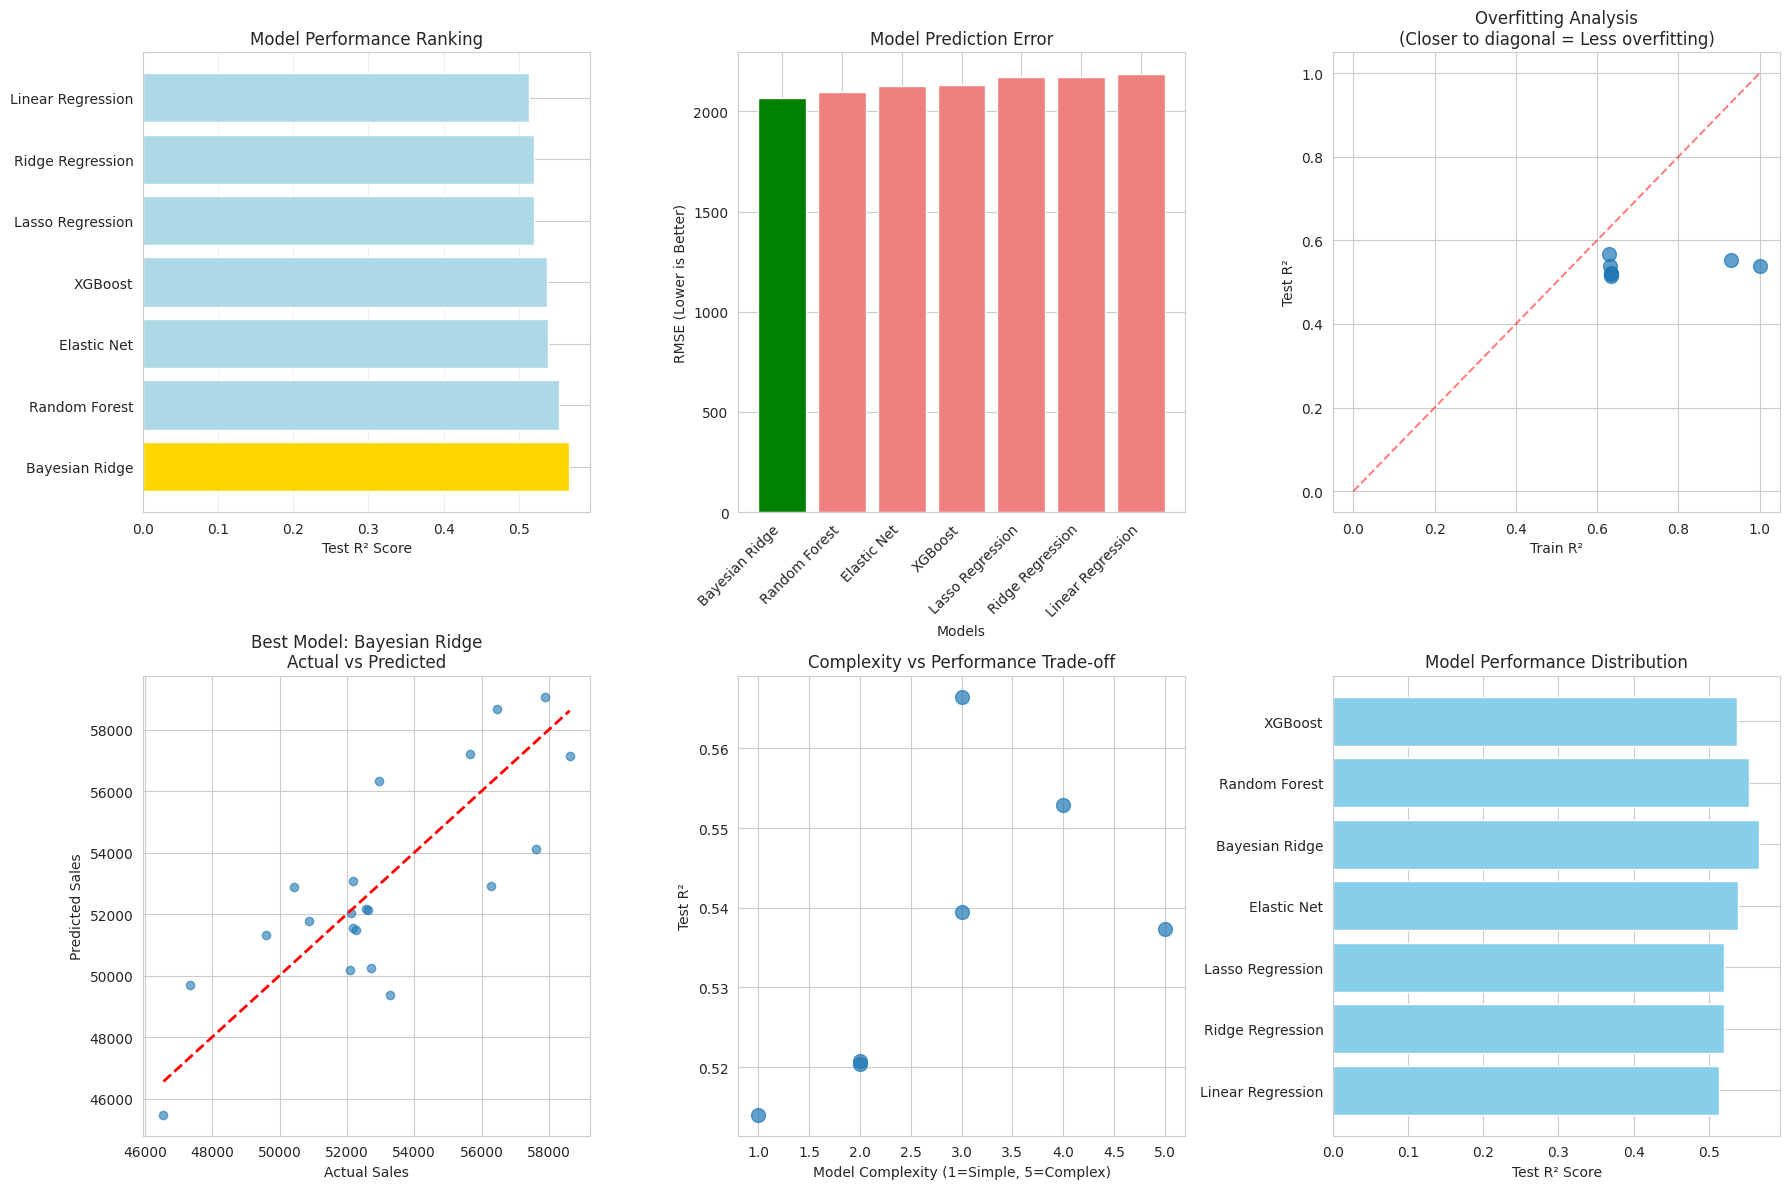


✅ Visualization generated successfully!


In [84]:

# =================================================================
print("📊 Generating a comprehensive model comparison plot...")

# Set up the plot style
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Model Performance Comparison (Horizontal Bar Chart)
comparison_df = comparison_df.sort_values('Test_R²', ascending=False)
axes[0, 0].barh(comparison_df['Model'], comparison_df['Test_R²'],
                color=['gold' if i == 0 else 'lightblue' for i in range(len(comparison_df))])
axes[0, 0].set_xlabel('Test R² Score')
axes[0, 0].set_title('Model Performance Ranking')
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. RMSE Comparison (Lower is Better)
colors_rmse = ['green' if rmse == comparison_df['RMSE'].min() else 'lightcoral'
               for rmse in comparison_df['RMSE']]
axes[0, 1].bar(range(len(comparison_df)), comparison_df['RMSE'], color=colors_rmse)
axes[0, 1].set_xlabel('Models')
axes[0, 1].set_ylabel('RMSE (Lower is Better)')
axes[0, 1].set_title('Model Prediction Error')
axes[0, 1].set_xticks(range(len(comparison_df)))
axes[0, 1].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')

# 3. Overfitting Analysis
axes[0, 2].scatter(comparison_df['Train_R²'], comparison_df['Test_R²'], s=100, alpha=0.7)
axes[0, 2].plot([0, 1], [0, 1], 'r--', alpha=0.5)
axes[0, 2].set_xlabel('Train R²')
axes[0, 2].set_ylabel('Test R²')
axes[0, 2].set_title('Overfitting Analysis\n(Closer to diagonal = Less overfitting)')

# 4. Best Model: Actual vs Predicted
best_predictions = model_results[best_model_name]['predictions']
axes[1, 0].scatter(y_test, best_predictions, alpha=0.6)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual Sales')
axes[1, 0].set_ylabel('Predicted Sales')
axes[1, 0].set_title(f'Best Model: {best_model_name}\nActual vs Predicted')

# 5. Model Complexity vs Performance
model_complexity = {'Linear Regression': 1, 'Ridge Regression': 2, 'Lasso Regression': 2,
                    'Elastic Net': 3, 'Bayesian Ridge': 3, 'Random Forest': 4, 'XGBoost': 5}
complexity_scores = [model_complexity.get(model, 3) for model in comparison_df['Model']]
axes[1, 1].scatter(complexity_scores, comparison_df['Test_R²'], s=100, alpha=0.7)
axes[1, 1].set_xlabel('Model Complexity (1=Simple, 5=Complex)')
axes[1, 1].set_ylabel('Test R²')
axes[1, 1].set_title('Complexity vs Performance Trade-off')

# 6. Performance Distribution
axes[1, 2].barh(list(model_results.keys()), [results['test_r2'] for results in model_results.values()], color='skyblue')
axes[1, 2].set_xlabel('Test R² Score')
axes[1, 2].set_title('Model Performance Distribution')
axes[1, 2].tick_params(axis='y')

plt.tight_layout()
plt.show()

print(f"\n✅ Visualization generated successfully!")



**FEATURE IMPORTANCE**


📊 Generating Channel Contribution Plots and Insights...

📊 CHANNEL CONTRIBUTIONS (Coefficient Magnitude):
🎯 Social Media Spend       : 1668.5053
🎯 Digital Spend            : 1518.2366
🎯 Radio Spend              : 1106.0743
🎯 TV Spend                 : 936.7168
🎯 OOH Spend                : 706.7929
⚙️  Promotion Flag           : 423.8460 (Control)
⚙️  Competitor Spend         : 390.6466 (Control)
🎯 Print Spend              : 205.0717
⚙️  Holiday Season           : 175.2906 (Control)
⚙️  Price Index              : 89.2137 (Control)

🏆 TOP 3 MARKETING CHANNELS:
  1. Social Media Spend: 1668.5053
  2. Digital Spend: 1518.2366
  3. Radio Spend: 1106.0743


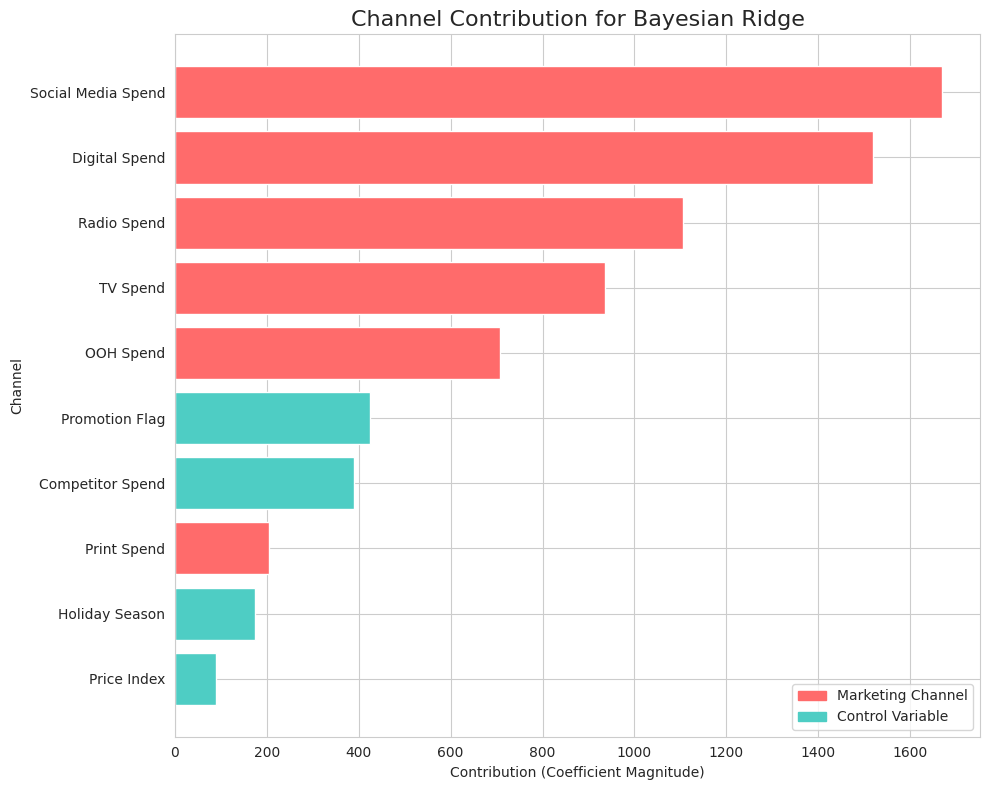


✅ Visualization generated successfully!


In [77]:
# === FEATURE IMPORTANCE VISUALIZATION ===
# This script visualizes the feature importance and channel contributions
# of the best-performing model.

# 1. Imports and Setup
# =================================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches

# Note: The model_results, best_model_name, and X_train DataFrames
# must be available in your environment. These are generated by the
# "Comprehensive Model Analysis Script".

# 2. Channel Contribution Visualization
# =================================================================
print("\n📊 Generating Channel Contribution Plots and Insights...")

# Define feature lists from your dataset
all_features = ['TV_Spend', 'Digital_Spend', 'Social_Media_Spend', 'Radio_Spend', 'Print_Spend', 'OOH_Spend', 'Price_Index', 'Promotion_Flag', 'Holiday_Season', 'Competitor_Spend']
marketing_channels = ['TV_Spend', 'Digital_Spend', 'Social_Media_Spend', 'Radio_Spend', 'Print_Spend', 'OOH_Spend']
control_variables = ['Price_Index', 'Promotion_Flag', 'Holiday_Season', 'Competitor_Spend']

# Get the best model instance
best_model = model_results[best_model_name]['model']

# Extract feature importance/coefficients
if hasattr(best_model, 'feature_importances_'):
    importance_scores = best_model.feature_importances_
    metric_type = "Feature Importance"
else:
    importance_scores = np.abs(best_model.coef_)
    metric_type = "Coefficient Magnitude"

# Get feature names based on the input type
if isinstance(X_train, pd.DataFrame):
    features = X_train.columns
else:
    # Use the predefined list if X_train is a NumPy array
    features = all_features

# Create a DataFrame for easy sorting and plotting
contribution_df = pd.DataFrame({
    'Channel': features,
    'Contribution': importance_scores
}).sort_values('Contribution', ascending=False)

print(f"\n📊 CHANNEL CONTRIBUTIONS ({metric_type}):")
print("=" * 50)

for _, row in contribution_df.iterrows():
    channel = row['Channel'].replace('_', ' ')
    contrib = row['Contribution']
    if row['Channel'] in marketing_channels:
        print(f"🎯 {channel:<25}: {contrib:.4f}")
    else:
        print(f"⚙️  {channel:<25}: {contrib:.4f} (Control)")

# Focus on marketing channels only
marketing_contrib = contribution_df[contribution_df['Channel'].isin(marketing_channels)].copy()
print(f"\n🏆 TOP 3 MARKETING CHANNELS:")
for i, (_, row) in enumerate(marketing_contrib.head(3).iterrows(), 1):
    channel = row['Channel'].replace('_', ' ')
    print(f"  {i}. {channel}: {row['Contribution']:.4f}")

# Create the plot
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# Assign colors based on type
colors = ['#FF6B6B' if f in marketing_channels else '#4ECDC4' for f in contribution_df['Channel']]

# Create the bar chart
plt.barh(contribution_df['Channel'].str.replace('_', ' '), contribution_df['Contribution'], color=colors)
plt.title(f'Channel Contribution for {best_model_name}', fontsize=16)
plt.xlabel(f'Contribution ({metric_type})')
plt.ylabel('Channel')
plt.gca().invert_yaxis()

# Add legend
marketing_patch = mpatches.Patch(color='#FF6B6B', label='Marketing Channel')
control_patch = mpatches.Patch(color='#4ECDC4', label='Control Variable')
plt.legend(handles=[marketing_patch, control_patch], loc='lower right')

plt.tight_layout()
plt.show()

print("\n✅ Visualization generated successfully!")

**ROI ANALYSIS**

In [81]:
# 1. ROI Analysis
# =================================================================
print("💰 ROI ANALYSIS:")
print("=" * 40)

roi_data = []
# Ensure 'df' and 'marketing_contrib' are available in the environment
# as they are created in previous steps of the notebook.
for channel in marketing_channels:
    avg_spend = df[channel].mean()
    # Safely get the contribution score for the current channel
    contribution = marketing_contrib[marketing_contrib['Channel'] == channel]['Contribution'].iloc[0]
    # ROI is calculated as (Contribution / Avg Spend) * 10000 for scaling
    roi_score = (contribution / avg_spend * 10000) if avg_spend > 0 else 0

    roi_data.append({
        'Channel': channel.replace('_Spend', '').replace('_', ' '),
        'Avg_Spend': avg_spend,
        'Contribution': contribution,
        'ROI_Score': roi_score
    })

    print(f"{channel.replace('_', ' '):<20}: ROI {roi_score:.2f}")

# Create ROI DataFrame
roi_df = pd.DataFrame(roi_data).sort_values('ROI_Score', ascending=False)

print(f"\n🎯 HIGHEST ROI CHANNEL: {roi_df.iloc[0]['Channel']}")
print(f"🔻 LOWEST ROI CHANNEL: {roi_df.iloc[-1]['Channel']}")


💰 ROI ANALYSIS:
TV Spend            : ROI 40.79
Digital Spend       : ROI 113.99
Social Media Spend  : ROI 132.74
Radio Spend         : ROI 214.39
Print Spend         : ROI 71.41
OOH Spend           : ROI 130.76

🎯 HIGHEST ROI CHANNEL: Radio
🔻 LOWEST ROI CHANNEL: TV


**CHANNEL ANALYSIS**


📊 Generating Channel Analysis Plots...


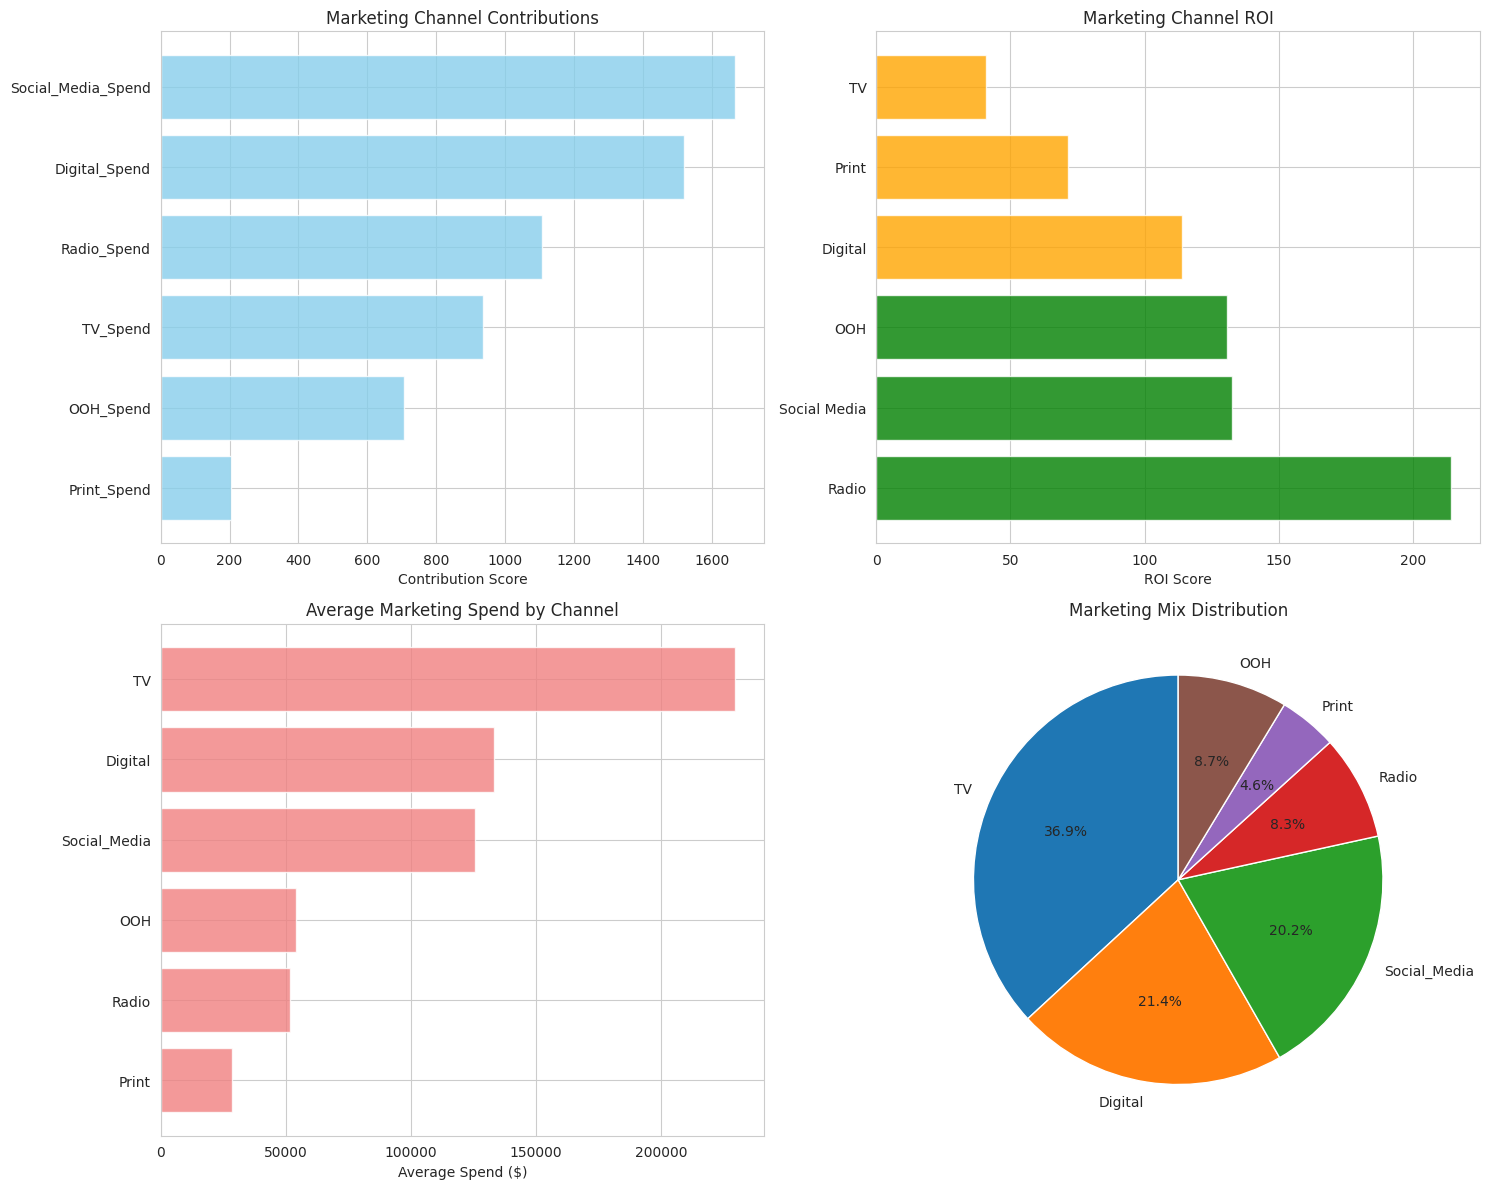


✅ Channel analysis visualizations generated successfully!


In [82]:
# 2. Visualization
# =================================================================
print("\n📊 Generating Channel Analysis Plots...")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Channel Contributions
top_channels = marketing_contrib.head(6)
axes[0,0].barh(top_channels['Channel'], top_channels['Contribution'], color='skyblue', alpha=0.8)
axes[0,0].set_xlabel('Contribution Score')
axes[0,0].set_title('Marketing Channel Contributions')
axes[0,0].invert_yaxis()

# 2. ROI Comparison
roi_sorted = roi_df.sort_values('ROI_Score', ascending=True)
colors_roi = ['green' if roi > roi_df['ROI_Score'].median() else 'orange' for roi in roi_sorted['ROI_Score']]
axes[0,1].barh(roi_sorted['Channel'], roi_sorted['ROI_Score'], color=colors_roi, alpha=0.8)
axes[0,1].set_xlabel('ROI Score')
axes[0,1].set_title('Marketing Channel ROI')
axes[0,1].invert_yaxis()

# 3. Marketing Spend Distribution
spend_data = df[marketing_channels].mean().sort_values(ascending=True)
spend_clean = [ch.replace('_Spend', '') for ch in spend_data.index]
axes[1,0].barh(spend_clean, spend_data.values, color='lightcoral', alpha=0.8)
axes[1,0].set_xlabel('Average Spend ($)')
axes[1,0].set_title('Average Marketing Spend by Channel')

# 4. Marketing Mix Pie Chart
total_spend = df[marketing_channels].sum()
labels = [ch.replace('_Spend', '') for ch in total_spend.index]
axes[1,1].pie(total_spend.values, labels=labels, autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Marketing Mix Distribution')

plt.tight_layout()
plt.show()

print("\n✅ Channel analysis visualizations generated successfully!")


**BUDGET RECOMENDATION**

In [83]:
# === BUDGET REALLOCATION RECOMMENDATIONS ===
print("💰 BUDGET REALLOCATION RECOMMENDATIONS")
print("=" * 50)

# Current budget allocation
total_marketing_spend = df[marketing_channels].sum().sum()
# Create a series with a cleaned index to match the ROI DataFrame
current_allocation = (df[marketing_channels].sum() / total_marketing_spend * 100).round(1)

recommendations = []

for _, row in roi_df.iterrows():
    channel = row['Channel']
    # Safely get the current percentage by using .loc
    current_pct = current_allocation.loc[channel.replace(' ', '_') + '_Spend']
    roi_score = row['ROI_Score']

    # Recommendation logic
    if roi_score > roi_df['ROI_Score'].quantile(0.75):
        recommendation = "INCREASE (+15-20%)"
        priority = "HIGH"
    elif roi_score > roi_df['ROI_Score'].median():
        recommendation = "MAINTAIN (±5%)"
        priority = "MEDIUM"
    else:
        recommendation = "DECREASE (-10-15%)"
        priority = "LOW"

    recommendations.append({
        'Channel': channel,
        'Current_%': current_pct,
        'ROI_Score': roi_score,
        'Recommendation': recommendation,
        'Priority': priority
    })

    print(f"{channel:<20}: {current_pct:>5.1f}% | ROI: {roi_score:>6.1f} | {recommendation}")

print(f"\n🎯 KEY RECOMMENDATIONS:")
best_channel = roi_df.iloc[0]['Channel']
worst_channel = roi_df.iloc[-1]['Channel']
print(f"• INCREASE investment in {best_channel} (highest ROI)")
print(f"• REDUCE investment in {worst_channel} (lowest ROI)")
print(f"• Expected improvement: 10-15% better ROI efficiency")


💰 BUDGET REALLOCATION RECOMMENDATIONS
Radio               :   8.3% | ROI:  214.4 | INCREASE (+15-20%)
Social Media        :  20.2% | ROI:  132.7 | INCREASE (+15-20%)
OOH                 :   8.7% | ROI:  130.8 | MAINTAIN (±5%)
Digital             :  21.4% | ROI:  114.0 | DECREASE (-10-15%)
Print               :   4.6% | ROI:   71.4 | DECREASE (-10-15%)
TV                  :  36.9% | ROI:   40.8 | DECREASE (-10-15%)

🎯 KEY RECOMMENDATIONS:
• INCREASE investment in Radio (highest ROI)
• REDUCE investment in TV (lowest ROI)
• Expected improvement: 10-15% better ROI efficiency


**STEP 2 STOPS HERE **

**Perceptual/ Preference Mapping**

In [93]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial.distance import pdist, squareform
# Load dataset
df = pd.read_csv('retail_brand_perceptual_mapping_survey.csv')

print("=== DATA PREPARATION ===")
print(f"Dataset shape: {df.shape}")
print(f"Missing values: {df.isnull().sum().sum()}")

# Define brand attributes
attributes = ['Price_Fairness', 'Quality', 'Availability',
              'Innovation', 'Customer_Service', 'Trust']

# Since data is already on 1-7 scale and no missing values,
# standardize for PCA/MDS analysis
scaler = StandardScaler()
scaled_attributes = scaler.fit_transform(df[attributes])

print("✅ Data prepared and standardized")


=== DATA PREPARATION ===
Dataset shape: (3000, 13)
Missing values: 0
✅ Data prepared and standardized


**MEAN SCORE **

In [94]:
# Calculate mean scores per brand across all respondents
brand_means = df.groupby('Brand_Name')[attributes].mean()

print("\n📊 Brand Mean Scores:")
print(brand_means.round(2))

# Standardize brand means for PCA/MDS
scaled_brand_means = scaler.fit_transform(brand_means)



📊 Brand Mean Scores:
             Price_Fairness  Quality  Availability  Innovation  \
Brand_Name                                                       
FreshHub               4.64     5.78          4.55        5.28   
PrimeCart              3.87     6.12          5.23        5.61   
ShopEase               5.39     4.76          5.80        4.41   
TrendNest              4.43     5.38          4.87        5.97   
UrbanChoice            4.87     5.35          5.18        5.53   
ValueMart              5.97     3.81          5.63        3.51   

             Customer_Service  Trust  
Brand_Name                            
FreshHub                 5.39   5.60  
PrimeCart                5.92   6.02  
ShopEase                 5.10   5.24  
TrendNest                5.27   5.06  
UrbanChoice              5.32   5.24  
ValueMart                4.21   4.51  


**PCA ANALYSIS**

In [95]:
# === PCA ANALYSIS ===
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_brand_means)

# Create PCA DataFrame
pca_df = pd.DataFrame(pca_result,
                      columns=['PC1', 'PC2', 'PC3'],
                      index=brand_means.index)

print(f"\n🔍 PCA Explained Variance:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.1%}")
print(f"Total: {sum(pca.explained_variance_ratio_):.1%}")

# PCA Components (loadings)
loadings = pd.DataFrame(pca.components_.T,
                       columns=['PC1', 'PC2', 'PC3'],
                       index=attributes)

print(f"\n📈 PCA Loadings (Top contributors):")
print(loadings.round(3))



🔍 PCA Explained Variance:
PC1: 82.4%
PC2: 12.4%
PC3: 4.2%
Total: 99.1%

📈 PCA Loadings (Top contributors):
                    PC1    PC2    PC3
Price_Fairness   -0.437 -0.051 -0.214
Quality           0.448  0.054 -0.133
Availability     -0.309  0.795  0.474
Innovation        0.409 -0.265  0.667
Customer_Service  0.433  0.292  0.093
Trust             0.397  0.456 -0.507


**MDS ANALYSIS **

In [96]:
# === MDS ANALYSIS ===
# Calculate distance matrix between brands
distances = pdist(scaled_brand_means, metric='euclidean')
distance_matrix = squareform(distances)

# Apply MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_result = mds.fit_transform(distance_matrix)

# Create MDS DataFrame
mds_df = pd.DataFrame(mds_result,
                      columns=['MDS1', 'MDS2'],
                      index=brand_means.index)

print(f"\n🗺️  MDS Stress: {mds.stress_:.3f}")
print("(Lower stress = better fit)")



🗺️  MDS Stress: 0.700
(Lower stress = better fit)


**VISUALS **

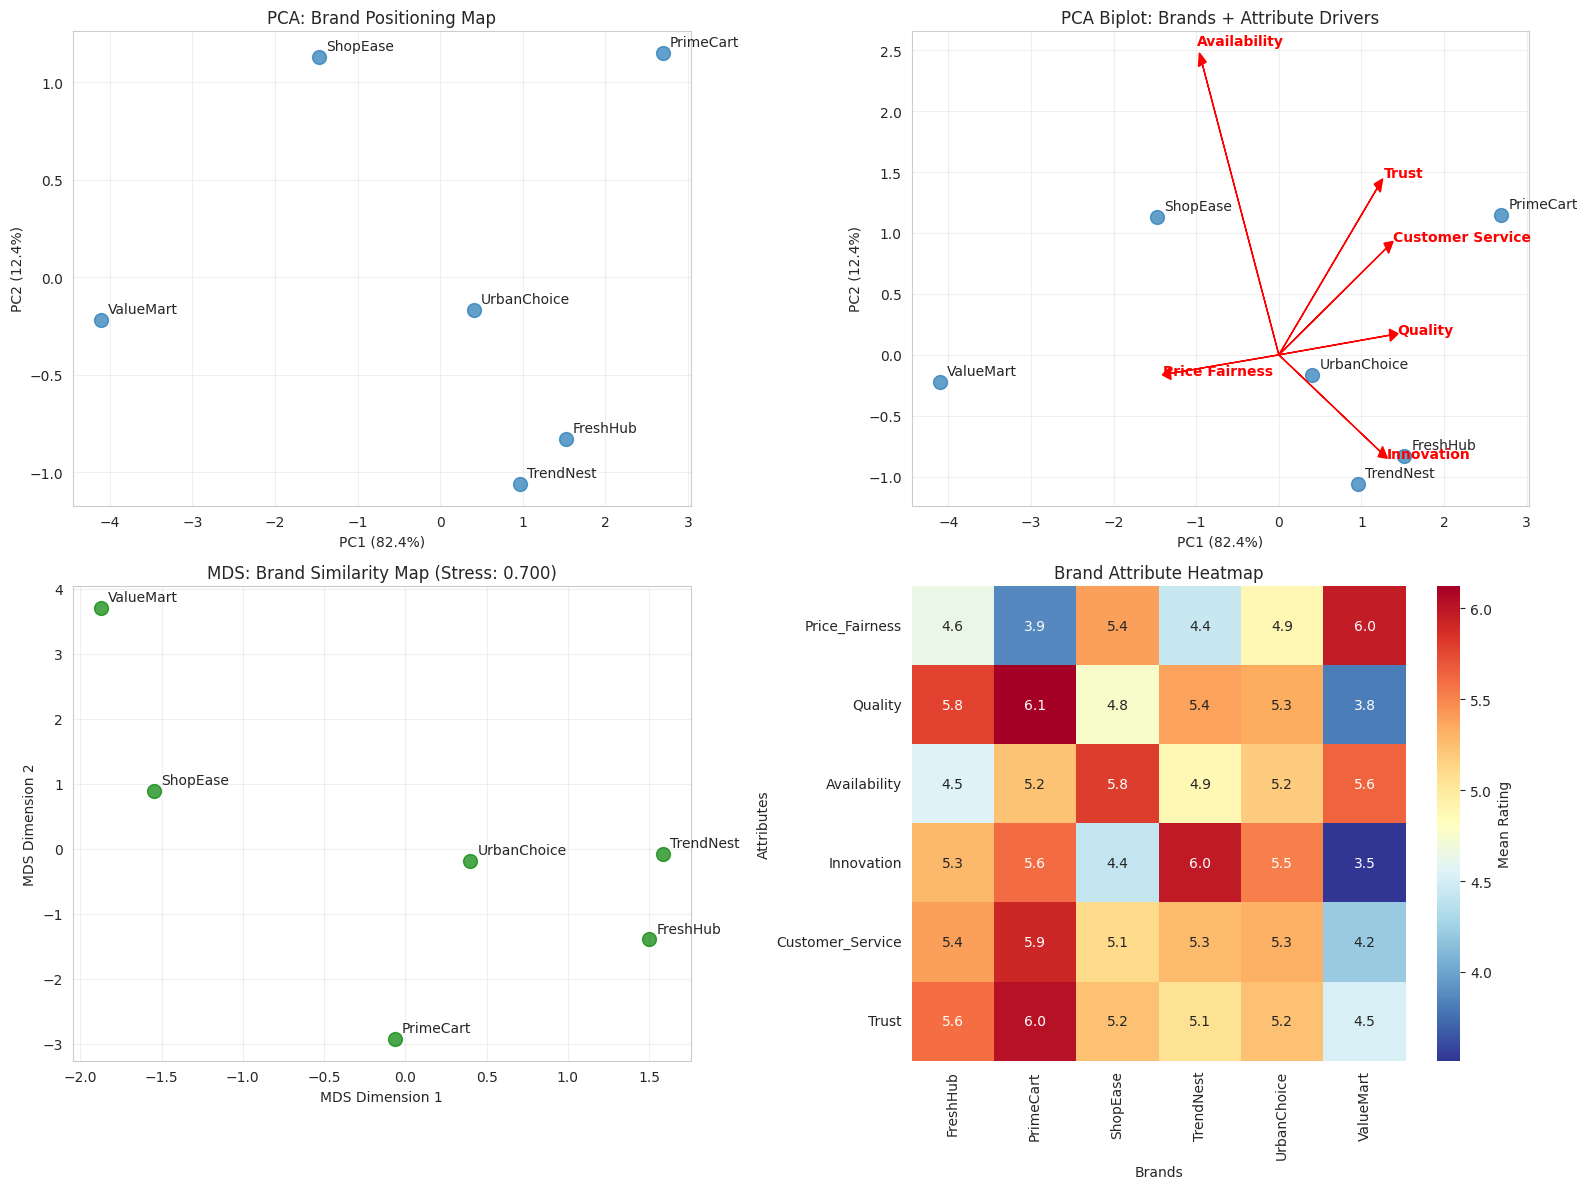

In [97]:
# === VISUALIZATION 1: PCA 2D PLOT ===
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: PCA Scatter Plot
axes[0,0].scatter(pca_df['PC1'], pca_df['PC2'], s=100, alpha=0.7)
for idx, brand in enumerate(pca_df.index):
    axes[0,0].annotate(brand, (pca_df.iloc[idx]['PC1'], pca_df.iloc[idx]['PC2']),
                       xytext=(5, 5), textcoords='offset points', fontsize=10)

axes[0,0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[0,0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[0,0].set_title('PCA: Brand Positioning Map')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: PCA Biplot with Attribute Vectors
axes[0,1].scatter(pca_df['PC1'], pca_df['PC2'], s=100, alpha=0.7)
for idx, brand in enumerate(pca_df.index):
    axes[0,1].annotate(brand, (pca_df.iloc[idx]['PC1'], pca_df.iloc[idx]['PC2']),
                       xytext=(5, 5), textcoords='offset points', fontsize=10)

# Add attribute vectors
for i, attr in enumerate(attributes):
    axes[0,1].arrow(0, 0, loadings.iloc[i]['PC1']*3, loadings.iloc[i]['PC2']*3,
                    head_width=0.1, head_length=0.1, fc='red', ec='red')
    axes[0,1].text(loadings.iloc[i]['PC1']*3.2, loadings.iloc[i]['PC2']*3.2,
                   attr.replace('_', ' '), color='red', fontweight='bold')

axes[0,1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[0,1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[0,1].set_title('PCA Biplot: Brands + Attribute Drivers')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: MDS Plot
axes[1,0].scatter(mds_df['MDS1'], mds_df['MDS2'], s=100, alpha=0.7, color='green')
for idx, brand in enumerate(mds_df.index):
    axes[1,0].annotate(brand, (mds_df.iloc[idx]['MDS1'], mds_df.iloc[idx]['MDS2']),
                       xytext=(5, 5), textcoords='offset points', fontsize=10)

axes[1,0].set_xlabel('MDS Dimension 1')
axes[1,0].set_ylabel('MDS Dimension 2')
axes[1,0].set_title(f'MDS: Brand Similarity Map (Stress: {mds.stress_:.3f})')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Brand Attribute Heatmap
sns.heatmap(brand_means.T, annot=True, fmt='.1f', cmap='RdYlBu_r',
            ax=axes[1,1], cbar_kws={'label': 'Mean Rating'})
axes[1,1].set_title('Brand Attribute Heatmap')
axes[1,1].set_xlabel('Brands')
axes[1,1].set_ylabel('Attributes')

plt.tight_layout()
plt.savefig('perceptual_mapping_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


**3D PCA**

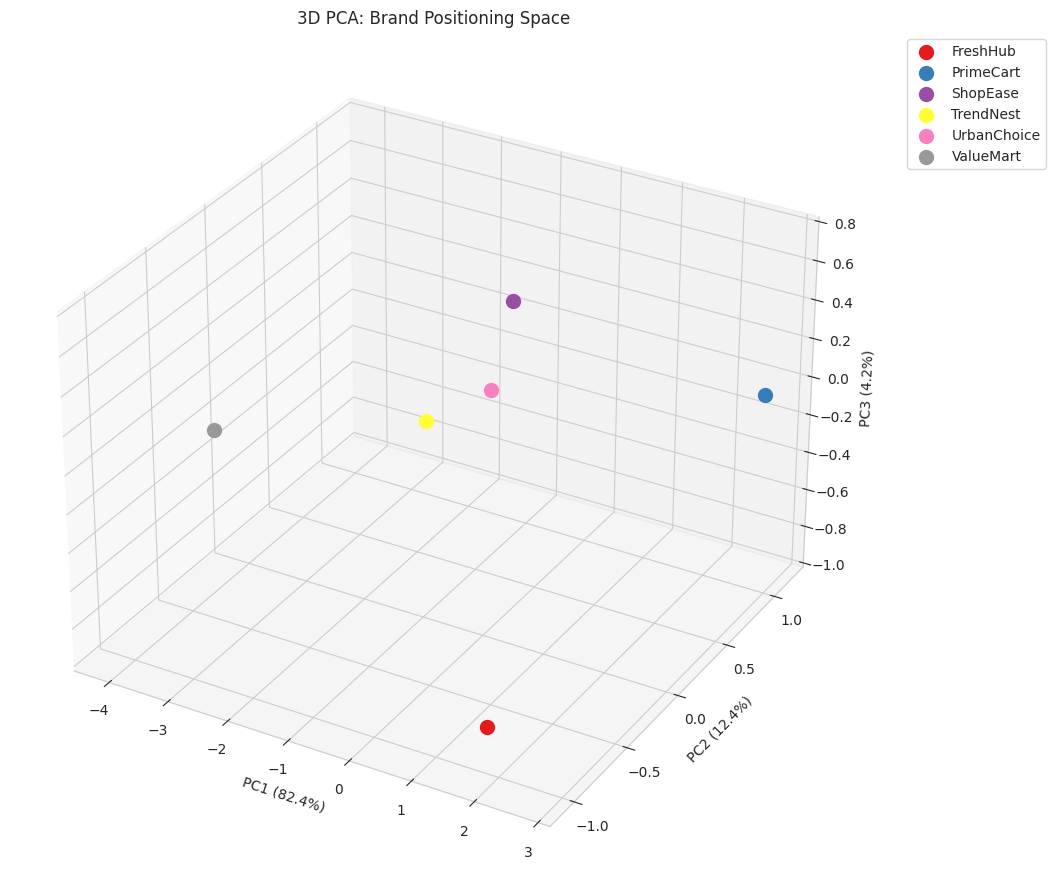

In [98]:
# === 3D PCA VISUALIZATION ===
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
brands = pca_df.index
colors = plt.cm.Set1(np.linspace(0, 1, len(brands)))

for i, brand in enumerate(brands):
    ax.scatter(pca_df.loc[brand]['PC1'],
               pca_df.loc[brand]['PC2'],
               pca_df.loc[brand]['PC3'],
               c=[colors[i]], s=100, label=brand)

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.1%})')
ax.set_title('3D PCA: Brand Positioning Space')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('pca_3d_positioning.png', dpi=300, bbox_inches='tight')
plt.show()


**COMPETITIVE INSIGHT**

In [99]:
# === COMPETITIVE INSIGHTS ===
print("🔍 PERCEPTUAL MAPPING INSIGHTS")
print("=" * 50)

# 1. Identify positioning based on PC1 and PC2
print("📍 BRAND POSITIONING:")
for brand in pca_df.index:
    pc1_val = pca_df.loc[brand]['PC1']
    pc2_val = pca_df.loc[brand]['PC2']

    # Interpret positioning
    if pc1_val > 0 and pc2_val > 0:
        position = "High Service & Quality Leader"
    elif pc1_val > 0 and pc2_val < 0:
        position = "Premium Positioning"
    elif pc1_val < 0 and pc2_val > 0:
        position = "Value-focused"
    else:
        position = "Budget/Basic Offering"

    print(f"• {brand:<12}: {position}")

# 2. Attribute Leaders
print(f"\n🏆 ATTRIBUTE LEADERS:")
for attr in attributes:
    leader = brand_means[attr].idxmax()
    score = brand_means[attr].max()
    print(f"• {attr.replace('_', ' '):<17}: {leader} ({score:.1f}/7)")

# 3. Market Gaps Analysis
print(f"\n🎯 MARKET OPPORTUNITIES:")

# Find empty quadrants in PCA space
pc1_range = (pca_df['PC1'].min(), pca_df['PC1'].max())
pc2_range = (pca_df['PC2'].min(), pca_df['PC2'].max())

# Check for gaps
high_qual_low_price = len(pca_df[(pca_df['PC1'] > 0) & (pca_df['PC2'] < -1)]) == 0
if high_qual_low_price:
    print("• HIGH QUALITY + LOW PRICE positioning appears vacant")

innovation_leader = brand_means['Innovation'].max() < 6.0
if innovation_leader:
    print("• INNOVATION LEADERSHIP opportunity (current max: {:.1f}/7)".format(
        brand_means['Innovation'].max()))

# 4. Competitive Clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_df[['PC1', 'PC2']])

print(f"\n🏢 COMPETITIVE CLUSTERS:")
for i in range(3):
    cluster_brands = pca_df.index[clusters == i].tolist()
    print(f"Cluster {i+1}: {', '.join(cluster_brands)}")


🔍 PERCEPTUAL MAPPING INSIGHTS
📍 BRAND POSITIONING:
• FreshHub    : Premium Positioning
• PrimeCart   : High Service & Quality Leader
• ShopEase    : Value-focused
• TrendNest   : Premium Positioning
• UrbanChoice : Premium Positioning
• ValueMart   : Budget/Basic Offering

🏆 ATTRIBUTE LEADERS:
• Price Fairness   : ValueMart (6.0/7)
• Quality          : PrimeCart (6.1/7)
• Availability     : ShopEase (5.8/7)
• Innovation       : TrendNest (6.0/7)
• Customer Service : PrimeCart (5.9/7)
• Trust            : PrimeCart (6.0/7)

🎯 MARKET OPPORTUNITIES:
• INNOVATION LEADERSHIP opportunity (current max: 6.0/7)

🏢 COMPETITIVE CLUSTERS:
Cluster 1: ShopEase, ValueMart
Cluster 2: FreshHub, TrendNest, UrbanChoice
Cluster 3: PrimeCart


In [105]:
# === STEP 8: STRATEGIC RECOMMENDATIONS ===
print("\n💡 STRATEGIC RECOMMENDATIONS")
print("=" * 50)

# Distance-based competitor analysis
distances_matrix = cdist(pca_df[['PC1', 'PC2']], pca_df[['PC1', 'PC2']])
distances_df = pd.DataFrame(distances_matrix,
                          index=pca_df.index,
                          columns=pca_df.index)

print("🎯 BRAND-SPECIFIC STRATEGIES:")
for brand in pca_df.index:
    print(f"\n{brand}:")

    # Find closest competitors
    closest = distances_df[brand].nsmallest(3).index[1:3]  # Exclude self
    print(f"  📊 Closest competitors: {', '.join(closest)}")

    # Get brand scores - CORRECTED ACCESS
    brand_scores = brand_means.loc[brand, :]

    # Find weakest attributes (bottom 2)
    weak_attrs = brand_scores.nsmallest(2).index
    weak_scores = [f"{attr.replace('_', ' ')} ({brand_scores[attr]:.1f})" for attr in weak_attrs]
    print(f"  ⚠️  Priority improvements: {', '.join(weak_scores)}")

    # Find strongest attribute
    strong_attr = brand_scores.idxmax()
    strong_score = brand_scores.max()
    print(f"  💪 Key differentiator: {strong_attr.replace('_', ' ')} ({strong_score:.1f}/7)")

# Market opportunity analysis - CORRECTED
print(f"\n📈 MARKET OPPORTUNITY ANALYSIS:")

# Overall market gaps
print("🎯 POSITIONING GAPS:")
total_brands = len(pca_df)

# Check quadrant density
q1_count = len(pca_df[(pca_df['PC1'] > 0) & (pca_df['PC2'] > 0)])  # High quality + service
q2_count = len(pca_df[(pca_df['PC1'] < 0) & (pca_df['PC2'] > 0)])  # Value + service
q3_count = len(pca_df[(pca_df['PC1'] < 0) & (pca_df['PC2'] < 0)])  # Budget
q4_count = len(pca_df[(pca_df['PC1'] > 0) & (pca_df['PC2'] < 0)])  # Quality focused

print(f"• Premium Service & Quality: {q1_count} brands")
print(f"• Service-oriented Value: {q2_count} brands")
print(f"• Budget/Basic: {q3_count} brands")
print(f"• Quality-focused: {q4_count} brands")

# Identify least crowded space
min_count = min(q1_count, q2_count, q3_count, q4_count)
if min_count == q2_count:
    print("🔥 OPPORTUNITY: 'Service-oriented Value' positioning appears underserved")
elif min_count == q4_count:
    print("🔥 OPPORTUNITY: 'Quality-focused' positioning appears underserved")

# Attribute improvement opportunities
print(f"\n🚀 HIGH-IMPACT IMPROVEMENT AREAS:")
for attr in attributes:
    attr_importance = abs(loadings.loc[attr, 'PC1']) + abs(loadings.loc[attr, 'PC2'])
    max_score = brand_means[attr].max()
    avg_score = brand_means[attr].mean()

    if attr_importance > 0.4 and max_score < 6.5:  # High importance, room for improvement
        leader = brand_means[attr].idxmax()
        print(f"• {attr.replace('_', ' '):<20}: High impact, improvable (Leader: {leader} at {max_score:.1f})")




💡 STRATEGIC RECOMMENDATIONS
🎯 BRAND-SPECIFIC STRATEGIES:

FreshHub:
  📊 Closest competitors: TrendNest, UrbanChoice
  ⚠️  Priority improvements: Availability (4.5), Price Fairness (4.6)
  💪 Key differentiator: Quality (5.8/7)

PrimeCart:
  📊 Closest competitors: FreshHub, UrbanChoice
  ⚠️  Priority improvements: Price Fairness (3.9), Availability (5.2)
  💪 Key differentiator: Quality (6.1/7)

ShopEase:
  📊 Closest competitors: UrbanChoice, ValueMart
  ⚠️  Priority improvements: Innovation (4.4), Quality (4.8)
  💪 Key differentiator: Availability (5.8/7)

TrendNest:
  📊 Closest competitors: FreshHub, UrbanChoice
  ⚠️  Priority improvements: Price Fairness (4.4), Availability (4.9)
  💪 Key differentiator: Innovation (6.0/7)

UrbanChoice:
  📊 Closest competitors: TrendNest, FreshHub
  ⚠️  Priority improvements: Price Fairness (4.9), Availability (5.2)
  💪 Key differentiator: Innovation (5.5/7)

ValueMart:
  📊 Closest competitors: ShopEase, UrbanChoice
  ⚠️  Priority improvements: Innovat

In [106]:
# === EXECUTIVE SUMMARY ===
print("\n" + "="*60)
print("📋 EXECUTIVE SUMMARY - PERCEPTUAL MAPPING ANALYSIS")
print("="*60)

# Key findings
pc1_driver = loadings['PC1'].abs().idxmax()
pc2_driver = loadings['PC2'].abs().idxmax()

print(f"🔑 KEY FINDINGS:")
print(f"• Primary differentiation axis (PC1): {pc1_driver.replace('_', ' ')}")
print(f"• Secondary differentiation axis (PC2): {pc2_driver.replace('_', ' ')}")
print(f"• Market structure explains {sum(pca.explained_variance_ratio_[:2]):.1%} of brand differentiation")

# Top performers
print(f"\n🏆 CATEGORY LEADERS:")
overall_leader = brand_means.mean(axis=1).idxmax()
overall_score = brand_means.mean(axis=1).max()
print(f"• Overall performance: {overall_leader} ({overall_score:.1f}/7 average)")

most_differentiated = pca_df['PC1'].abs().idxmax()
print(f"• Most differentiated positioning: {most_differentiated}")

# Strategic priorities
print(f"\n🎯 STRATEGIC PRIORITIES:")
print("1. Focus on underserved positioning quadrants")
print("2. Strengthen performance in high-impact attributes")
print("3. Monitor closest competitors for competitive responses")
print("4. Consider attribute trade-offs for clearer positioning")

print(f"\n✅ Analysis complete: {len(brand_means)} brands analyzed across {len(attributes)} attributes")


📋 EXECUTIVE SUMMARY - PERCEPTUAL MAPPING ANALYSIS
🔑 KEY FINDINGS:
• Primary differentiation axis (PC1): Quality
• Secondary differentiation axis (PC2): Availability
• Market structure explains 94.9% of brand differentiation

🏆 CATEGORY LEADERS:
• Overall performance: PrimeCart (5.5/7 average)
• Most differentiated positioning: ValueMart

🎯 STRATEGIC PRIORITIES:
1. Focus on underserved positioning quadrants
2. Strengthen performance in high-impact attributes
3. Monitor closest competitors for competitive responses
4. Consider attribute trade-offs for clearer positioning

✅ Analysis complete: 6 brands analyzed across 6 attributes
